# Stats Prework

**Source:** ThinkStats (Allen Downey)

# **Table of Contents**
**Exercises**
> Q1. [Think Stats Chapter 2 Exercise 4 (Cohen's D)](#Q1)  
> Q2. [Think Stats Chapter 3 Exercise 1 (actual vs. biased)](#Q2)  
> Q3. [Think Stats Chapter 4 Exercise 2 (random distribution)](#Q3)  
> Q4. [Think Stats Chapter 5 Exercise 1 (normal distribution of blue men)](#Q4)  
> Q5. [Bayesian (Elvis Presley twin)](#Q5)  
> Q6. [Bayesian & Frequentist Comparison](#Q6)  

**Optional Exercises** 
> Q7. [Think Stats Chapter 7 Exercise 1 (correlation of weight vs. age)](#Q7)  
> Q8. [Think Stats Chapter 8 Exercise 2 (sampling distribution)](#Q8)  
> Q9. [Think Stats Chapter 6 Exercise 1 (skewness of household income)](#Q9)  
> Q10. [Think Stats Chapter 8 Exercise 3 (scoring)](#Q10)  
> Q11. [Think Stats Chapter 9 Exercise 2 (resampling)](#Q11)





## Exercises

### Q1. Think Stats Chapter 2 Exercise 4 (effect size of Cohen's d)
<a id="Q1"></a>

Cohen's D is an example of effect size. Other examples of effect size are: correlation between two variables, mean difference, regression coefficients and standardized test statistics such as: t, Z, F, etc. In this example, you will compute Cohen's D to quantify (or measure) the difference between two groups of data.

You will see effect size again and again in results of algorithms that are run in data science. For instance, in the bootcamp, when you run a regression analysis, you will recognize the t-statistic as an example of effect size.


**Exercise:**

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. 

How does it compare to the difference in pregnancy length?

In [252]:
# for matplotlib graphs to be included in notebook

%matplotlib inline


#import libraries

import numpy as np

#import files
import thinkstats2
import nsfg
import first


In [253]:
#load data from pregnancy file 
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [254]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [255]:
#function to calculate Cohen effect

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [256]:
# Mean first baby total weight and other babies total weight

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [257]:
# Cohen effect for first baby total weight and other babies total weight

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

In [258]:
# Cohen Effect for pregnancy length

CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

### Q2. Think Stats Chapter 3 Exercise 1 (actual vs. biased)
<a id="Q2"></a>

This problem presents a robust example of actual vs biased data. As a data scientist, it will be important to examine not only the data that is available, but also the data that may be missing but highly relevant. You will see how the absence of this relevant data will bias a dataset, its distribution, and ultimately, its statistical interpretation.

**Exercise:**   

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

In [259]:
#load data

resp = nsfg.ReadFemResp()

In [260]:
# Actual Pmf 

pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

In [261]:
#function that calculates biased PMF

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [262]:
# Biased pmf 

biased = BiasPmf(pmf, label='biased')

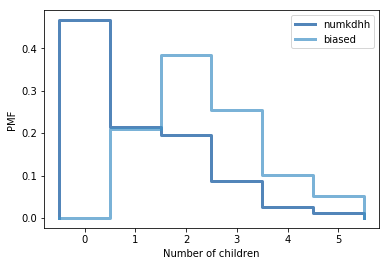

In [263]:
# Plot actual and biased distributions

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [264]:
# Calculate means

print(pmf.Mean())

print(biased.Mean())

1.024205155043831
2.403679100664282


### Q3. Think Stats Chapter 4 Exercise 2 (random distribution)
<a id="Q3"></a>

This questions asks you to examine the function that produces random numbers. Is it really random? A good way to test that is to examine the pmf and cdf of the list of random numbers and visualize the distribution. If you're not sure what pmf is, read more about it in Chapter 3.

**Exercise:**

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [265]:
# generate 1000 numbers with uniform distribution between 0 and 1

t = np.random.random(1000)

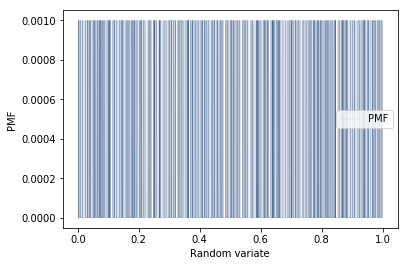

In [266]:
# plot PMF

pmf = thinkstats2.Pmf(t, label='PMF')
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')



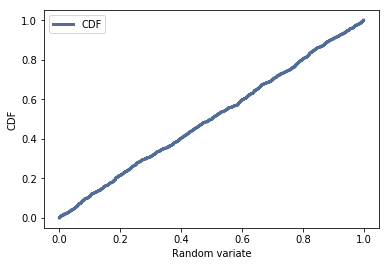

In [267]:
# Plot CDF

cdf = thinkstats2.Cdf(t, label ='CDF')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')



### Q4. Think Stats Chapter 5 Exercise 1 (normal distribution of blue men)
<a id="Q4"></a>

This is a classic example of hypothesis testing using the normal distribution. The effect size used here is the Z-statistic.  

**Exercise:**  

In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and
6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [268]:
# import

import scipy

In [269]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [270]:
# amount of people between 5'10" and 6'1"

low = dist.cdf(177.8) 
high = dist.cdf(185.4)  
low, high, high-low

(0.48963902786483265, 0.8317337108107857, 0.3420946829459531)

### Q5. Bayesian (Elvis Presley twin)
<a id="Q5"></a>

Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way. It helps incorporate conditional probabilities into our conclusions.

Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

P(identical & twin brother) = P(identical) * P(both boys|identical) = 1/2 * 1/300 = 1/600  
P(fraternal & twin brother) = P(fraternal) * P(both boys|fraternal) = 1/4 * 1/125 = 1/500  

P(identical|twin brother) = 
> = P(identical & twin brother) / P(twin brother) 

> = (1/600) / [(1/600)+ (1/500)]  

> = 5/11



### Q6. Bayesian & Frequentist Comparison
<a id="Q6"></a>

How do frequentist and Bayesian statistics compare?

Frequentist believe that probability it based on observed frequencies from sampling. Bayesians  incorporate some prior knowledge or beliefs as they assess probability.

## Optional Exercises 

### Q7. Think Stats Chapter 7 Exercise 1 (correlation of weight vs. age)
<a id="Q7"></a>


In this exercise, you will compute the effect size of correlation. Correlation measures the relationship of two variables, and data science is about exploring relationships in data.

### Q8. Think Stats Chapter 8 Exercise 2 (sampling distribution)
<a id="Q8"></a>

In the theoretical world, all data related to an experiment or a scientific problem would be available. In the real world, some subset of that data is available. This exercise asks you to take samples from an exponential distribution and examine how the standard error and confidence intervals vary with the sample size.

### Q9. Think Stats Chapter 6 Exercise 1 (skewness of household income)
<a id="Q9"></a>

### Q10. Think Stats Chapter 8 Exercise 3 (scoring)
<a id="Q10"></a>

### Q11. Think Stats Chapter 9 Exercise 2 (resampling)
<a id="Q11"></a>